# COMPSCI 589 HW1

#### Name: Haochen Wang

### SECTION 0: Load Libraries

In [189]:
import sklearn.model_selection
import scipy
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
from operator import itemgetter
from collections import Counter

### SECTION 1: Evaluating KNN

In [190]:
#Load the Iris data file using python csv module

knn_file = open('iris.csv')
csvreader = csv.reader(knn_file)

knnd = []
for row in csvreader:
        knnd.append(row)

knndata = []
for row in knnd:
        c = []
        c.append(float(row[0]))
        c.append(float(row[1]))
        c.append(float(row[2]))
        c.append(float(row[3]))
        c.append(row[4])
        knndata.append(c)

# print(knndata)


In [191]:
# Implementing Helper functions

# Normalize module
def mini(col):
    min = col[0]
    for val in col:
        if val < min:
            min = val
    return min

def maxi(col):
    max = col[0]
    for val in col:
        if val > max:
            max = val
    return max

def normalizationall(col, max, min):
    newarr = []
    for val in col:
        newarr.append((val-min)/(max-min)) 
    return newarr

def normalization(col):
    min = mini(col)
    max = maxi(col)
    newarr = []
    for val in col:
        newarr.append((val-min)/(max-min)) 
    return newarr, min, max

def vote(arr):
    return max(set(arr), key=arr.count)

In [192]:
# Split the Training and Testing Data

def split(dat, ranumber):
    traknn, tesknn = sklearn.model_selection.train_test_split(dat, train_size=0.8, test_size=0.2, random_state=ranumber, shuffle=True)
    return traknn, tesknn

# trainknn, testknn = split(knndata, 589)

In [193]:
# Euclidean distance

def edistance(a, b):
    a = np.array(a)
    b = np.array(b)
    s = np.linalg.norm(a - b)
    return s

# print(edistance([1,1,1,4],[5,5,5,2]))


In [194]:
# KD-Tree

# I will do it later if I have enough time.

In [195]:
# KNN Helpers

# def seperate_d_c(data):
#     dat = []
#     cat = []
#     all = []
#     for row in data:
#         da = []
#         da.append(float(row[0]))
#         da.append(float(row[1]))
#         da.append(float(row[2]))
#         da.append(float(row[3]))
#         dat.append(da)
#         al = da.copy()
#         al.append(row[4])
#         all.append(al)
#         cat.append(row[4])
        
#     return dat, cat, all

# trainknndata, trainknncat, ktr = seperate_d_c(trainknn)
# testknndata, testknncat, kte = seperate_d_c(testknn)

def transpose(dat):
    a = []
    a.append([row[0] for row in dat])
    a.append([row[1] for row in dat])
    a.append([row[2] for row in dat])
    a.append([row[3] for row in dat])
    if len(dat[0]) > 4:
        a.append([row[4] for row in dat])
    return a

def normaltab(traindat, testdat):
    trainnom = []
    testnom = []
    i = 0
    for col in traindat:
        trarr = []
        tearr = []
        if i < 4:
            trarr, trmin, trmax = normalization(col)
            tearr = normalizationall(testdat[i], trmax, trmin)
            trainnom.append(trarr)
            testnom.append(tearr)
            i+=1
    if len(traindat) == 5:
        trainnom.append(traindat[4])
        testnom.append(testdat[4])
    return trainnom, testnom
    
def transback(dat):
    ret = []
    i = 0
    while i < len(dat[0]):
        row = []
        for col in dat:
            row.append(col[i])
        ret.append(row)
        i+=1
    return ret

def distarray(normpt, normeddat):
    pt1 = normpt[:-1]
    cat1 = normpt[-1]
    disarray = []
    for ins in normeddat:
        pt2 = ins[:-1]
        cat2 = ins[-1]
        dis = edistance(pt1, pt2)
        disarray.append([dis,cat2])
    return sorted(disarray, key=itemgetter(0))

def normflow(train, test):
    ttrainknn = transpose(train)
    ttestknn = transpose(test)
    normttrain, normttest = normaltab(ttrainknn,ttestknn)
    nrmtr, nrmte = transback(normttrain), transback(normttest)
    return nrmtr, nrmte

# we use normtr, normte.  stands for normal train & normal test.

In [196]:
#KNN

def knn(k, traindat, testdat):
    predict = []
    correct = [col[-1] for col in testdat]
    for datpt in testdat:
        distlist = distarray(datpt, traindat)
        catlist = [col[1] for col in distlist[:k]]
        predict.append(vote(catlist))

    return predict, correct

def knntrains(k, rand, dat):
    trainknn, testknn = split(dat, rand)
    normedtrain, normedtest =normflow(trainknn, testknn)
    predict, correct = knn(k, normedtrain, normedtest)
    return predict, correct

def knntraintrain(k, rand, dat):
    trainknn, testknn = split(dat, rand)
    normedtrain, normedtest =normflow(trainknn, testknn)
    predict, correct = knn(k, normedtrain, normedtrain)
    return predict, correct

def accuracy(pred, corr):
    i = 0
    blist = []
    while i < len(pred):
        blist.append(pred[i]==corr[i])
        i+=1
    return (Counter(blist)[True])/len(blist)

def kaccuracytest(k, r, data):
    p, c = knntrains(k, r, data)
    acc = accuracy(p, c)
    return acc

def kaccuracytrain(k, r, data):
    p, c = knntraintrain(k, r, data)
    acc = accuracy(p, c)
    return acc

# print(kaccuracytest(19, 589, knndata))
# print(kaccuracytrain(19, 589, knndata))

In [197]:
# The Statistical Process for the kNN
def statdatatest(data):
    k = 1
    result_list = []
    while k <= 51:
        random = 11589
        alist = []
        while random < 11689:
            alist.append(kaccuracytest(k, random, data))
            random += 5
        result_list.append(alist)
        k+=2
    
    return np.array(result_list)

def statdatatrain(data):
    k = 1
    result_list = []
    while k <= 51:
        random = 11589
        alist = []
        while random < 11689:
            alist.append(kaccuracytrain(k, random, data))
            random += 5
        result_list.append(alist)
        k+=2
    
    return np.array(result_list)

# narray = statdatatest(knndata)
# print(narray.std(axis=1))

In [198]:
k = np.arange(1,52,2)
narraytrain = statdatatrain(knndata)
narraytest = statdatatest(knndata)
acctrain = narraytrain.mean(axis=1)
print(acctrain)
acctest = narraytest.mean(axis=1)
stdtrain = narraytrain.std(axis=1)
stdtest = narraytest.std(axis=1)
print(stdtrain)

[1.         0.96458333 0.96291667 0.96958333 0.96666667 0.96625
 0.96875    0.96541667 0.96541667 0.96166667 0.95958333 0.95916667
 0.95791667 0.95791667 0.95833333 0.95833333 0.955      0.94958333
 0.94583333 0.94       0.93583333 0.93083333 0.92625    0.91666667
 0.90625    0.905     ]
[0.         0.00828109 0.01069625 0.00960143 0.00645497 0.0116294
 0.0078506  0.01186586 0.01095287 0.00889757 0.00884865 0.00909059
 0.00892679 0.00852895 0.00950146 0.00745356 0.00927961 0.01036655
 0.01163687 0.01481366 0.01469599 0.0175     0.01608895 0.02074983
 0.02022014 0.01814295]


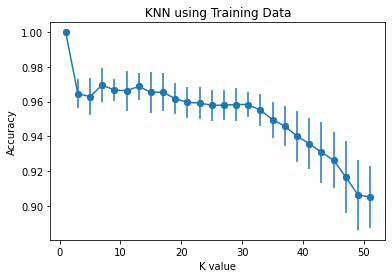

In [199]:
# Q1.1
plt.scatter(k, acctrain)
  
plt.errorbar(k, acctrain, yerr=stdtrain, fmt="-o")
plt.title("KNN using Training Data")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

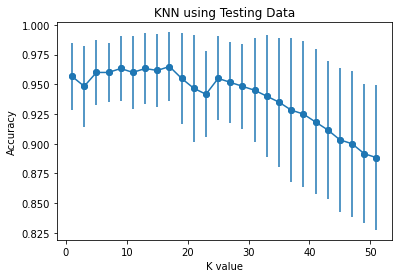

In [200]:
# Q1.2
plt.scatter(k, acctest)
  
plt.errorbar(k, acctest, yerr=stdtest, fmt="-o")
plt.title("KNN using Testing Data")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()